In [ ]:
#Low-resolution spatial transcriptomics data simplified version.
from scSTADE import scSTADE
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp

def setup_seed(seed=41):
    import torch
    import os
    import numpy as np
    import random
    torch.manual_seed(seed)  
    np.random.seed(seed)  # Numpy module.
    random.seed(seed)  # Python random module.
    if torch.cuda.is_available():
        # torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
        torch.cuda.manual_seed(seed)  
        torch.cuda.manual_seed_all(seed) 
        #os.environ['PYTHONHASHSEED'] = str(seed)

setup_seed(41)

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')


n_clusters = 30  ###### the number of spatial domains.
file_fold = '/home/cuiyaxuan/spatialLIBD/3.Human_Breast_Cancer' #### to your path
adata = sc.read_visium(file_fold, count_file='filtered_feature_bc_matrix.h5', load_images=True) #### project name
adata.var_names_make_unique()
model = scSTADE(adata,device=device,n_top_genes=5000)
adata = model.train()
radius = 50
tool = 'mclust' # mclust, leiden, and louvain
from utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=True)
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=2.0, increment=0.01, refinement=False)

adata.obs['domain']
adata.obs['domain'].to_csv("label.csv")

Begin to train ST data...



  0%|                                                   | 0/500 [00:00<?, ?it/s]

0



  0%|                                           | 1/500 [00:03<29:53,  3.59s/it]

0



  0%|▏                                          | 2/500 [00:07<30:10,  3.64s/it]

0



  1%|▎                                          | 3/500 [00:10<29:51,  3.61s/it]

0



  1%|▎                                          | 4/500 [00:14<29:26,  3.56s/it]

0



  1%|▍                                          | 5/500 [00:17<27:51,  3.38s/it]

0



  1%|▌                                          | 6/500 [00:20<28:20,  3.44s/it]

0



  1%|▌                                          | 7/500 [00:24<28:43,  3.50s/it]

0



  2%|▋                                          | 8/500 [00:28<28:52,  3.52s/it]

0



  2%|▊                                          | 9/500 [00:31<28:55,  3.54s/it]

0



  2%|▊                                         | 10/500 [00:35<29:12,  3.58s/it]

0



  2%|▉                                         | 11/500 [00:38<29:07,  3.57s/it]

0



  2%|█                                         | 12/500 [00:42<27:52,  3.43s/it]

0



  3%|█                                         | 13/500 [00:45<28:27,  3.51s/it]

0



  3%|█▏                                        | 14/500 [00:48<27:49,  3.44s/it]

0



  3%|█▎                                        | 15/500 [00:52<28:18,  3.50s/it]

0



  3%|█▎                                        | 16/500 [00:56<28:46,  3.57s/it]

0



  3%|█▍                                        | 17/500 [01:00<29:12,  3.63s/it]

0



  4%|█▌                                        | 18/500 [01:03<29:09,  3.63s/it]

0



  4%|█▌                                        | 19/500 [01:07<29:00,  3.62s/it]

0



  4%|█▋                                        | 20/500 [01:10<28:47,  3.60s/it]

0



  4%|█▊                                        | 21/500 [01:14<28:20,  3.55s/it]

0



  4%|█▊                                        | 22/500 [01:18<28:41,  3.60s/it]

0



  5%|█▉                                        | 23/500 [01:21<28:51,  3.63s/it]

0



  5%|██                                        | 24/500 [01:25<29:05,  3.67s/it]

0



  5%|██                                        | 25/500 [01:29<29:00,  3.66s/it]

0



  5%|██▏                                       | 26/500 [01:32<28:18,  3.58s/it]

0



  5%|██▎                                       | 27/500 [01:36<27:59,  3.55s/it]

0



  6%|██▎                                       | 28/500 [01:39<28:12,  3.59s/it]

0



  6%|██▍                                       | 29/500 [01:43<28:16,  3.60s/it]

0



  6%|██▌                                       | 30/500 [01:46<28:19,  3.62s/it]

0



  6%|██▌                                       | 31/500 [01:50<27:03,  3.46s/it]

0



  6%|██▋                                       | 32/500 [01:53<27:13,  3.49s/it]

0



  7%|██▊                                       | 33/500 [01:56<26:21,  3.39s/it]

0



  7%|██▊                                       | 34/500 [01:59<25:14,  3.25s/it]

0



  7%|██▉                                       | 35/500 [02:03<26:15,  3.39s/it]

0



  7%|███                                       | 36/500 [02:06<25:42,  3.32s/it]

0



  7%|███                                       | 37/500 [02:10<26:19,  3.41s/it]

0



  8%|███▏                                      | 38/500 [02:13<26:48,  3.48s/it]

0



  8%|███▎                                      | 39/500 [02:17<27:18,  3.55s/it]

0



  8%|███▎                                      | 40/500 [02:21<27:04,  3.53s/it]

0



  8%|███▍                                      | 41/500 [02:24<26:47,  3.50s/it]

0



  8%|███▌                                      | 42/500 [02:27<25:58,  3.40s/it]

0



  9%|███▌                                      | 43/500 [02:31<26:48,  3.52s/it]

0



  9%|███▋                                      | 44/500 [02:35<26:53,  3.54s/it]

0



  9%|███▊                                      | 45/500 [02:38<26:40,  3.52s/it]

0



  9%|███▊                                      | 46/500 [02:41<26:22,  3.48s/it]

0



  9%|███▉                                      | 47/500 [02:44<25:20,  3.36s/it]

0



 10%|████                                      | 48/500 [02:48<25:49,  3.43s/it]

0



 10%|████                                      | 49/500 [02:52<25:54,  3.45s/it]

0



 10%|████▏                                     | 50/500 [02:55<26:09,  3.49s/it]

0



 10%|████▎                                     | 51/500 [02:59<26:24,  3.53s/it]

0



 10%|████▎                                     | 52/500 [03:02<26:43,  3.58s/it]

0



 11%|████▍                                     | 53/500 [03:05<25:03,  3.36s/it]

0



 11%|████▌                                     | 54/500 [03:09<25:38,  3.45s/it]

0



 11%|████▌                                     | 55/500 [03:13<25:52,  3.49s/it]

0



 11%|████▋                                     | 56/500 [03:16<26:04,  3.52s/it]

0



 11%|████▊                                     | 57/500 [03:20<26:10,  3.55s/it]

0



 12%|████▊                                     | 58/500 [03:23<26:05,  3.54s/it]

0



 12%|████▉                                     | 59/500 [03:27<26:18,  3.58s/it]

0



 12%|█████                                     | 60/500 [03:30<25:08,  3.43s/it]

0



 12%|█████                                     | 61/500 [03:34<25:13,  3.45s/it]

0



 12%|█████▏                                    | 62/500 [03:37<25:03,  3.43s/it]

0



 13%|█████▎                                    | 63/500 [03:41<25:42,  3.53s/it]

0



 13%|█████▍                                    | 64/500 [03:44<25:48,  3.55s/it]

0



 13%|█████▍                                    | 65/500 [03:48<25:55,  3.57s/it]

0



 13%|█████▌                                    | 66/500 [03:51<24:42,  3.42s/it]

0



 13%|█████▋                                    | 67/500 [03:55<24:57,  3.46s/it]

0



 14%|█████▋                                    | 68/500 [03:58<24:50,  3.45s/it]

0



 14%|█████▊                                    | 69/500 [04:01<24:15,  3.38s/it]

0



 14%|█████▉                                    | 70/500 [04:04<23:48,  3.32s/it]

0



 14%|█████▉                                    | 71/500 [04:08<24:28,  3.42s/it]

0



 14%|██████                                    | 72/500 [04:12<25:11,  3.53s/it]

0



 15%|██████▏                                   | 73/500 [04:15<24:53,  3.50s/it]

0



 15%|██████▏                                   | 74/500 [04:18<24:02,  3.39s/it]

0



 15%|██████▎                                   | 75/500 [04:22<24:51,  3.51s/it]

0



 15%|██████▍                                   | 76/500 [04:26<24:44,  3.50s/it]

0



 15%|██████▍                                   | 77/500 [04:29<24:54,  3.53s/it]

0



 16%|██████▌                                   | 78/500 [04:33<24:54,  3.54s/it]

0



 16%|██████▋                                   | 79/500 [04:36<23:47,  3.39s/it]

0



 16%|██████▋                                   | 80/500 [04:39<24:01,  3.43s/it]

0



 16%|██████▊                                   | 81/500 [04:43<24:26,  3.50s/it]

0



 16%|██████▉                                   | 82/500 [04:47<24:48,  3.56s/it]

0



 17%|██████▉                                   | 83/500 [04:50<25:09,  3.62s/it]

0



 17%|███████                                   | 84/500 [04:54<24:59,  3.60s/it]

0



 17%|███████▏                                  | 85/500 [04:58<24:50,  3.59s/it]

0



 17%|███████▏                                  | 86/500 [05:01<23:46,  3.44s/it]

0



 17%|███████▎                                  | 87/500 [05:04<24:11,  3.52s/it]

0



 18%|███████▍                                  | 88/500 [05:08<24:26,  3.56s/it]

0



 18%|███████▍                                  | 89/500 [05:12<24:12,  3.53s/it]

0



 18%|███████▌                                  | 90/500 [05:15<24:14,  3.55s/it]

0



 18%|███████▋                                  | 91/500 [05:19<24:05,  3.53s/it]

0



 18%|███████▋                                  | 92/500 [05:22<24:11,  3.56s/it]

0



 19%|███████▊                                  | 93/500 [05:26<24:01,  3.54s/it]

0



 19%|███████▉                                  | 94/500 [05:29<22:58,  3.39s/it]

0



 19%|███████▉                                  | 95/500 [05:32<22:41,  3.36s/it]

0



 19%|████████                                  | 96/500 [05:36<23:06,  3.43s/it]

0



 19%|████████▏                                 | 97/500 [05:39<23:13,  3.46s/it]

0



 20%|████████▏                                 | 98/500 [05:42<22:19,  3.33s/it]

0



 20%|████████▎                                 | 99/500 [05:46<23:09,  3.47s/it]

0



 20%|████████▏                                | 100/500 [05:49<22:52,  3.43s/it]

0



 20%|████████▎                                | 101/500 [05:53<23:10,  3.48s/it]

0



 20%|████████▎                                | 102/500 [05:57<23:29,  3.54s/it]

0



 21%|████████▍                                | 103/500 [06:00<23:40,  3.58s/it]

0



 21%|████████▌                                | 104/500 [06:04<23:31,  3.56s/it]

0



 21%|████████▌                                | 105/500 [06:08<23:44,  3.61s/it]

0



 21%|████████▋                                | 106/500 [06:11<23:55,  3.64s/it]

0



 21%|████████▊                                | 107/500 [06:15<23:48,  3.64s/it]

0



 22%|████████▊                                | 108/500 [06:19<23:59,  3.67s/it]

0



 22%|████████▉                                | 109/500 [06:22<23:37,  3.63s/it]

0



 22%|█████████                                | 110/500 [06:26<23:23,  3.60s/it]

0



 22%|█████████                                | 111/500 [06:29<23:36,  3.64s/it]

0



 22%|█████████▏                               | 112/500 [06:33<22:56,  3.55s/it]

0



 23%|█████████▎                               | 113/500 [06:36<23:11,  3.59s/it]

0



 23%|█████████▎                               | 114/500 [06:40<22:43,  3.53s/it]

0



 23%|█████████▍                               | 115/500 [06:44<23:04,  3.60s/it]

0



 23%|█████████▌                               | 116/500 [06:47<23:01,  3.60s/it]

0



 23%|█████████▌                               | 117/500 [06:51<23:07,  3.62s/it]

0



 24%|█████████▋                               | 118/500 [06:54<22:37,  3.55s/it]

0



 24%|█████████▊                               | 119/500 [06:58<22:56,  3.61s/it]

0



 24%|█████████▊                               | 120/500 [07:01<21:37,  3.41s/it]

0



 24%|█████████▉                               | 121/500 [07:05<22:04,  3.49s/it]

0



 24%|██████████                               | 122/500 [07:08<22:20,  3.55s/it]

0



 25%|██████████                               | 123/500 [07:12<22:19,  3.55s/it]

0



 25%|██████████▏                              | 124/500 [07:16<22:36,  3.61s/it]

0



 25%|██████████▎                              | 125/500 [07:19<22:25,  3.59s/it]

0



 25%|██████████▎                              | 126/500 [07:23<22:44,  3.65s/it]

0



 25%|██████████▍                              | 127/500 [07:27<22:52,  3.68s/it]

0



 26%|██████████▍                              | 128/500 [07:30<22:48,  3.68s/it]

0



 26%|██████████▌                              | 129/500 [07:34<22:34,  3.65s/it]

0



 26%|██████████▋                              | 130/500 [07:38<22:32,  3.66s/it]

0



 26%|██████████▋                              | 131/500 [07:41<22:08,  3.60s/it]

0



 26%|██████████▊                              | 132/500 [07:45<22:14,  3.63s/it]

0



 27%|██████████▉                              | 133/500 [07:48<22:07,  3.62s/it]

0



 27%|██████████▉                              | 134/500 [07:52<22:10,  3.64s/it]

0



 27%|███████████                              | 135/500 [07:56<22:14,  3.66s/it]

0



 27%|███████████▏                             | 136/500 [07:59<22:04,  3.64s/it]

0



 27%|███████████▏                             | 137/500 [08:03<22:01,  3.64s/it]

0



 28%|███████████▎                             | 138/500 [08:07<21:40,  3.59s/it]

0



 28%|███████████▍                             | 139/500 [08:10<21:21,  3.55s/it]

0



 28%|███████████▍                             | 140/500 [08:14<21:24,  3.57s/it]

0



 28%|███████████▌                             | 141/500 [08:17<20:36,  3.44s/it]

0



 28%|███████████▋                             | 142/500 [08:20<20:51,  3.50s/it]

0



 29%|███████████▋                             | 143/500 [08:24<20:38,  3.47s/it]

0



 29%|███████████▊                             | 144/500 [08:27<20:55,  3.53s/it]

0



 29%|███████████▉                             | 145/500 [08:31<21:08,  3.57s/it]

0



 29%|███████████▉                             | 146/500 [08:35<21:15,  3.60s/it]

0



 29%|████████████                             | 147/500 [08:38<21:04,  3.58s/it]

0



 30%|████████████▏                            | 148/500 [08:42<21:03,  3.59s/it]

0



 30%|████████████▏                            | 149/500 [08:45<20:16,  3.47s/it]

0



 30%|████████████▎                            | 150/500 [08:49<20:30,  3.52s/it]

0



 30%|████████████▍                            | 151/500 [08:52<20:37,  3.54s/it]

0



 30%|████████████▍                            | 152/500 [08:56<20:49,  3.59s/it]

0



 31%|████████████▌                            | 153/500 [08:59<19:56,  3.45s/it]

0



 31%|████████████▋                            | 154/500 [09:03<19:52,  3.45s/it]

0



 31%|████████████▋                            | 155/500 [09:06<19:09,  3.33s/it]

0



 31%|████████████▊                            | 156/500 [09:09<18:53,  3.29s/it]

0



 31%|████████████▊                            | 157/500 [09:13<19:33,  3.42s/it]

0



 32%|████████████▉                            | 158/500 [09:16<19:20,  3.39s/it]

0



 32%|█████████████                            | 159/500 [09:20<19:52,  3.50s/it]

0



 32%|█████████████                            | 160/500 [09:23<19:57,  3.52s/it]

0



 32%|█████████████▏                           | 161/500 [09:27<20:17,  3.59s/it]

0



 32%|█████████████▎                           | 162/500 [09:30<20:02,  3.56s/it]

0



 33%|█████████████▎                           | 163/500 [09:34<20:17,  3.61s/it]

0



 33%|█████████████▍                           | 164/500 [09:38<20:00,  3.57s/it]

0



 33%|█████████████▌                           | 165/500 [09:41<20:03,  3.59s/it]

0



 33%|█████████████▌                           | 166/500 [09:45<20:12,  3.63s/it]

0



 33%|█████████████▋                           | 167/500 [09:48<19:52,  3.58s/it]

0



 34%|█████████████▊                           | 168/500 [09:52<19:46,  3.57s/it]

0



 34%|█████████████▊                           | 169/500 [09:55<18:51,  3.42s/it]

0



 34%|█████████████▉                           | 170/500 [09:59<19:07,  3.48s/it]

0



 34%|██████████████                           | 171/500 [10:02<18:56,  3.45s/it]

0



 34%|██████████████                           | 172/500 [10:06<19:15,  3.52s/it]

0



 35%|██████████████▏                          | 173/500 [10:09<19:18,  3.54s/it]

0



 35%|██████████████▎                          | 174/500 [10:13<19:26,  3.58s/it]

0



 35%|██████████████▎                          | 175/500 [10:17<19:34,  3.62s/it]

0



 35%|██████████████▍                          | 176/500 [10:20<19:42,  3.65s/it]

0



 35%|██████████████▌                          | 177/500 [10:24<19:14,  3.57s/it]

0



 36%|██████████████▌                          | 178/500 [10:27<19:04,  3.55s/it]

0



 36%|██████████████▋                          | 179/500 [10:31<18:55,  3.54s/it]

0



 36%|██████████████▊                          | 180/500 [10:34<18:48,  3.53s/it]

0



 36%|██████████████▊                          | 181/500 [10:38<18:12,  3.42s/it]

0



 36%|██████████████▉                          | 182/500 [10:41<18:24,  3.47s/it]

0



 37%|███████████████                          | 183/500 [10:45<18:38,  3.53s/it]

0



 37%|███████████████                          | 184/500 [10:48<18:22,  3.49s/it]

0



 37%|███████████████▏                         | 185/500 [10:52<18:26,  3.51s/it]

0



 37%|███████████████▎                         | 186/500 [10:55<18:18,  3.50s/it]

0



 37%|███████████████▎                         | 187/500 [10:59<18:31,  3.55s/it]

0



 38%|███████████████▍                         | 188/500 [11:03<18:38,  3.59s/it]

0



 38%|███████████████▍                         | 189/500 [11:06<18:38,  3.60s/it]

0



 38%|███████████████▌                         | 190/500 [11:10<18:26,  3.57s/it]

0



 38%|███████████████▋                         | 191/500 [11:13<18:17,  3.55s/it]

0



 38%|███████████████▋                         | 192/500 [11:17<18:27,  3.60s/it]

0



 39%|███████████████▊                         | 193/500 [11:21<18:25,  3.60s/it]

0



 39%|███████████████▉                         | 194/500 [11:24<18:27,  3.62s/it]

0



 39%|███████████████▉                         | 195/500 [11:28<18:09,  3.57s/it]

0



 39%|████████████████                         | 196/500 [11:31<18:06,  3.58s/it]

0



 39%|████████████████▏                        | 197/500 [11:35<17:34,  3.48s/it]

0



 40%|████████████████▏                        | 198/500 [11:38<17:36,  3.50s/it]

0



 40%|████████████████▎                        | 199/500 [11:42<17:38,  3.52s/it]

0



 40%|████████████████▍                        | 200/500 [11:45<17:14,  3.45s/it]

0



 40%|████████████████▍                        | 201/500 [11:49<17:38,  3.54s/it]

0



 40%|████████████████▌                        | 202/500 [11:52<17:26,  3.51s/it]

0



 41%|████████████████▋                        | 203/500 [11:56<17:35,  3.55s/it]

0



 41%|████████████████▋                        | 204/500 [11:59<16:44,  3.39s/it]

0



 41%|████████████████▊                        | 205/500 [12:02<16:49,  3.42s/it]

0



 41%|████████████████▉                        | 206/500 [12:06<17:05,  3.49s/it]

0



 41%|████████████████▉                        | 207/500 [12:09<16:20,  3.35s/it]

0



 42%|█████████████████                        | 208/500 [12:12<15:59,  3.29s/it]

0



 42%|█████████████████▏                       | 209/500 [12:15<16:04,  3.31s/it]

0



 42%|█████████████████▏                       | 210/500 [12:19<16:33,  3.43s/it]

0



 42%|█████████████████▎                       | 211/500 [12:23<16:54,  3.51s/it]

0



 42%|█████████████████▍                       | 212/500 [12:26<17:03,  3.55s/it]

0



 43%|█████████████████▍                       | 213/500 [12:30<17:16,  3.61s/it]

0



 43%|█████████████████▌                       | 214/500 [12:34<17:18,  3.63s/it]

0



 43%|█████████████████▋                       | 215/500 [12:38<17:16,  3.64s/it]

0



 43%|█████████████████▋                       | 216/500 [12:41<17:12,  3.64s/it]

0



 43%|█████████████████▊                       | 217/500 [12:45<17:00,  3.60s/it]

0



 44%|█████████████████▉                       | 218/500 [12:48<17:00,  3.62s/it]

0



 44%|█████████████████▉                       | 219/500 [12:52<16:33,  3.54s/it]

0



 44%|██████████████████                       | 220/500 [12:55<16:29,  3.53s/it]

0



 44%|██████████████████                       | 221/500 [12:58<16:01,  3.44s/it]

0



 44%|██████████████████▏                      | 222/500 [13:02<16:21,  3.53s/it]

0



 45%|██████████████████▎                      | 223/500 [13:06<16:14,  3.52s/it]

0



 45%|██████████████████▎                      | 224/500 [13:09<16:24,  3.57s/it]

0



 45%|██████████████████▍                      | 225/500 [13:13<16:23,  3.58s/it]

0



 45%|██████████████████▌                      | 226/500 [13:16<15:42,  3.44s/it]

0



 45%|██████████████████▌                      | 227/500 [13:20<15:58,  3.51s/it]

0



 46%|██████████████████▋                      | 228/500 [13:23<16:09,  3.56s/it]

0



 46%|██████████████████▊                      | 229/500 [13:27<15:57,  3.53s/it]

0



 46%|██████████████████▊                      | 230/500 [13:30<15:24,  3.42s/it]

0



 46%|██████████████████▉                      | 231/500 [13:34<15:38,  3.49s/it]

0



 46%|███████████████████                      | 232/500 [13:37<15:47,  3.54s/it]

0



 47%|███████████████████                      | 233/500 [13:41<15:58,  3.59s/it]

0



 47%|███████████████████▏                     | 234/500 [13:45<16:01,  3.62s/it]

0



 47%|███████████████████▎                     | 235/500 [13:48<15:42,  3.56s/it]

0



 47%|███████████████████▎                     | 236/500 [13:52<15:28,  3.52s/it]

0



 47%|███████████████████▍                     | 237/500 [13:55<15:18,  3.49s/it]

0



 48%|███████████████████▌                     | 238/500 [13:59<15:31,  3.56s/it]

0



 48%|███████████████████▌                     | 239/500 [14:02<15:40,  3.60s/it]

0



 48%|███████████████████▋                     | 240/500 [14:06<15:22,  3.55s/it]

0



 48%|███████████████████▊                     | 241/500 [14:09<15:19,  3.55s/it]

0



 48%|███████████████████▊                     | 242/500 [14:13<15:22,  3.58s/it]

0



 49%|███████████████████▉                     | 243/500 [14:16<14:49,  3.46s/it]

0



 49%|████████████████████                     | 244/500 [14:20<14:48,  3.47s/it]

0



 49%|████████████████████                     | 245/500 [14:23<14:41,  3.46s/it]

0



 49%|████████████████████▏                    | 246/500 [14:27<14:52,  3.51s/it]

0



 49%|████████████████████▎                    | 247/500 [14:30<14:26,  3.42s/it]

0



 50%|████████████████████▎                    | 248/500 [14:33<14:15,  3.39s/it]

0



 50%|████████████████████▍                    | 249/500 [14:37<14:34,  3.48s/it]

0



 50%|████████████████████▌                    | 250/500 [14:40<14:18,  3.43s/it]

0



 50%|████████████████████▌                    | 251/500 [14:44<14:26,  3.48s/it]

0



 50%|████████████████████▋                    | 252/500 [14:48<14:27,  3.50s/it]

0



 51%|████████████████████▋                    | 253/500 [14:51<14:41,  3.57s/it]

0



 51%|████████████████████▊                    | 254/500 [14:55<14:41,  3.58s/it]

0



 51%|████████████████████▉                    | 255/500 [14:59<14:51,  3.64s/it]

0



 51%|████████████████████▉                    | 256/500 [15:02<14:40,  3.61s/it]

0



 51%|█████████████████████                    | 257/500 [15:06<14:29,  3.58s/it]

0



 52%|█████████████████████▏                   | 258/500 [15:09<14:32,  3.60s/it]

0



 52%|█████████████████████▏                   | 259/500 [15:13<14:16,  3.56s/it]

0



 52%|█████████████████████▎                   | 260/500 [15:16<13:38,  3.41s/it]

0



 52%|█████████████████████▍                   | 261/500 [15:19<13:26,  3.38s/it]

0



 52%|█████████████████████▍                   | 262/500 [15:23<13:44,  3.46s/it]

0



 53%|█████████████████████▌                   | 263/500 [15:27<13:59,  3.54s/it]

0



 53%|█████████████████████▋                   | 264/500 [15:29<13:11,  3.35s/it]

0



 53%|█████████████████████▋                   | 265/500 [15:33<13:24,  3.42s/it]

0



 53%|█████████████████████▊                   | 266/500 [15:37<13:36,  3.49s/it]

0



 53%|█████████████████████▉                   | 267/500 [15:40<13:49,  3.56s/it]

0



 54%|█████████████████████▉                   | 268/500 [15:44<14:03,  3.64s/it]

0



 54%|██████████████████████                   | 269/500 [15:48<13:58,  3.63s/it]

0



 54%|██████████████████████▏                  | 270/500 [15:52<13:57,  3.64s/it]

0



 54%|██████████████████████▏                  | 271/500 [15:55<13:58,  3.66s/it]

0



 54%|██████████████████████▎                  | 272/500 [15:58<13:14,  3.49s/it]

0



 55%|██████████████████████▍                  | 273/500 [16:02<12:58,  3.43s/it]

0



 55%|██████████████████████▍                  | 274/500 [16:05<12:34,  3.34s/it]

0



 55%|██████████████████████▌                  | 275/500 [16:08<12:54,  3.44s/it]

0



 55%|██████████████████████▋                  | 276/500 [16:12<13:04,  3.50s/it]

0



 55%|██████████████████████▋                  | 277/500 [16:16<13:12,  3.55s/it]

0



 56%|██████████████████████▊                  | 278/500 [16:19<13:14,  3.58s/it]

0



 56%|██████████████████████▉                  | 279/500 [16:23<13:08,  3.57s/it]

0



 56%|██████████████████████▉                  | 280/500 [16:26<13:05,  3.57s/it]

0



 56%|███████████████████████                  | 281/500 [16:30<13:00,  3.57s/it]

0



 56%|███████████████████████                  | 282/500 [16:33<12:24,  3.42s/it]

0



 57%|███████████████████████▏                 | 283/500 [16:37<12:26,  3.44s/it]

0



 57%|███████████████████████▎                 | 284/500 [16:40<12:39,  3.52s/it]

0



 57%|███████████████████████▎                 | 285/500 [16:44<12:28,  3.48s/it]

0



 57%|███████████████████████▍                 | 286/500 [16:47<12:15,  3.44s/it]

0



 57%|███████████████████████▌                 | 287/500 [16:51<12:31,  3.53s/it]

0



 58%|███████████████████████▌                 | 288/500 [16:54<12:36,  3.57s/it]

0



 58%|███████████████████████▋                 | 289/500 [16:58<12:39,  3.60s/it]

0



 58%|███████████████████████▊                 | 290/500 [17:02<12:37,  3.61s/it]

0



 58%|███████████████████████▊                 | 291/500 [17:05<12:42,  3.65s/it]

0



 58%|███████████████████████▉                 | 292/500 [17:09<12:35,  3.63s/it]

0



 59%|████████████████████████                 | 293/500 [17:13<12:32,  3.64s/it]

0



 59%|████████████████████████                 | 294/500 [17:16<12:13,  3.56s/it]

0



 59%|████████████████████████▏                | 295/500 [17:20<12:17,  3.60s/it]

0



 59%|████████████████████████▎                | 296/500 [17:23<12:08,  3.57s/it]

0



 59%|████████████████████████▎                | 297/500 [17:27<12:10,  3.60s/it]

0



 60%|████████████████████████▍                | 298/500 [17:31<12:11,  3.62s/it]

0



 60%|████████████████████████▌                | 299/500 [17:34<12:07,  3.62s/it]

0



 60%|████████████████████████▌                | 300/500 [17:38<12:04,  3.62s/it]

0



 60%|████████████████████████▋                | 301/500 [17:41<11:54,  3.59s/it]

0



 60%|████████████████████████▊                | 302/500 [17:45<11:55,  3.61s/it]

0



 61%|████████████████████████▊                | 303/500 [17:49<11:54,  3.63s/it]

0



 61%|████████████████████████▉                | 304/500 [17:52<11:51,  3.63s/it]

0



 61%|█████████████████████████                | 305/500 [17:56<11:50,  3.64s/it]

0



 61%|█████████████████████████                | 306/500 [18:00<11:51,  3.67s/it]

0



 61%|█████████████████████████▏               | 307/500 [18:03<11:35,  3.60s/it]

0



 62%|█████████████████████████▎               | 308/500 [18:07<11:33,  3.61s/it]

0



 62%|█████████████████████████▎               | 309/500 [18:10<11:04,  3.48s/it]

0



 62%|█████████████████████████▍               | 310/500 [18:14<11:16,  3.56s/it]

0



 62%|█████████████████████████▌               | 311/500 [18:17<11:05,  3.52s/it]

0



 62%|█████████████████████████▌               | 312/500 [18:21<11:03,  3.53s/it]

0



 63%|█████████████████████████▋               | 313/500 [18:24<11:09,  3.58s/it]

0



 63%|█████████████████████████▋               | 314/500 [18:28<11:06,  3.58s/it]

0



 63%|█████████████████████████▊               | 315/500 [18:32<11:07,  3.61s/it]

0



 63%|█████████████████████████▉               | 316/500 [18:35<10:52,  3.55s/it]

0



 63%|█████████████████████████▉               | 317/500 [18:39<10:58,  3.60s/it]

0



 64%|██████████████████████████               | 318/500 [18:43<11:03,  3.65s/it]

0



 64%|██████████████████████████▏              | 319/500 [18:46<10:57,  3.63s/it]

0



 64%|██████████████████████████▏              | 320/500 [18:49<10:13,  3.41s/it]

0



 64%|██████████████████████████▎              | 321/500 [18:52<10:11,  3.41s/it]

0



 64%|██████████████████████████▍              | 322/500 [18:56<10:20,  3.48s/it]

0



 65%|██████████████████████████▍              | 323/500 [19:00<10:23,  3.52s/it]

0



 65%|██████████████████████████▌              | 324/500 [19:03<10:25,  3.55s/it]

0



 65%|██████████████████████████▋              | 325/500 [19:07<10:19,  3.54s/it]

0



 65%|██████████████████████████▋              | 326/500 [19:10<10:16,  3.54s/it]

0



 65%|██████████████████████████▊              | 327/500 [19:14<10:14,  3.55s/it]

0



 66%|██████████████████████████▉              | 328/500 [19:17<10:07,  3.53s/it]

0



 66%|██████████████████████████▉              | 329/500 [19:21<10:04,  3.53s/it]

0



 66%|███████████████████████████              | 330/500 [19:25<10:13,  3.61s/it]

0



 66%|███████████████████████████▏             | 331/500 [19:28<10:03,  3.57s/it]

0



 66%|███████████████████████████▏             | 332/500 [19:32<09:57,  3.55s/it]

0



 67%|███████████████████████████▎             | 333/500 [19:36<10:02,  3.61s/it]

0



 67%|███████████████████████████▍             | 334/500 [19:39<09:48,  3.55s/it]

0



 67%|███████████████████████████▍             | 335/500 [19:43<09:50,  3.58s/it]

0



 67%|███████████████████████████▌             | 336/500 [19:46<09:43,  3.56s/it]

0



 67%|███████████████████████████▋             | 337/500 [19:50<09:36,  3.54s/it]

0



 68%|███████████████████████████▋             | 338/500 [19:53<09:38,  3.57s/it]

0



 68%|███████████████████████████▊             | 339/500 [19:57<09:38,  3.59s/it]

0



 68%|███████████████████████████▉             | 340/500 [20:01<09:36,  3.61s/it]

0



 68%|███████████████████████████▉             | 341/500 [20:04<09:32,  3.60s/it]

0



 68%|████████████████████████████             | 342/500 [20:08<09:29,  3.60s/it]

0



 69%|████████████████████████████▏            | 343/500 [20:11<09:17,  3.55s/it]

0



 69%|████████████████████████████▏            | 344/500 [20:15<09:21,  3.60s/it]

0



 69%|████████████████████████████▎            | 345/500 [20:18<09:16,  3.59s/it]

0



 69%|████████████████████████████▎            | 346/500 [20:22<08:59,  3.50s/it]

0



 69%|████████████████████████████▍            | 347/500 [20:25<09:06,  3.57s/it]

0



 70%|████████████████████████████▌            | 348/500 [20:29<09:04,  3.58s/it]

0



 70%|████████████████████████████▌            | 349/500 [20:33<09:05,  3.61s/it]

0



 70%|████████████████████████████▋            | 350/500 [20:36<09:04,  3.63s/it]

0



 70%|████████████████████████████▊            | 351/500 [20:40<08:55,  3.59s/it]

0



 70%|████████████████████████████▊            | 352/500 [20:43<08:40,  3.52s/it]

0



 71%|████████████████████████████▉            | 353/500 [20:47<08:41,  3.55s/it]

0



 71%|█████████████████████████████            | 354/500 [20:50<08:12,  3.38s/it]

0



 71%|█████████████████████████████            | 355/500 [20:54<08:25,  3.48s/it]

0



 71%|█████████████████████████████▏           | 356/500 [20:57<08:19,  3.47s/it]

0



 71%|█████████████████████████████▎           | 357/500 [21:01<08:28,  3.56s/it]

0



 72%|█████████████████████████████▎           | 358/500 [21:04<07:58,  3.37s/it]

0



 72%|█████████████████████████████▍           | 359/500 [21:07<08:08,  3.47s/it]

0



 72%|█████████████████████████████▌           | 360/500 [21:11<08:15,  3.54s/it]

0



 72%|█████████████████████████████▌           | 361/500 [21:15<08:05,  3.49s/it]

0



 72%|█████████████████████████████▋           | 362/500 [21:18<08:12,  3.57s/it]

0



 73%|█████████████████████████████▊           | 363/500 [21:22<08:10,  3.58s/it]

0



 73%|█████████████████████████████▊           | 364/500 [21:26<08:11,  3.61s/it]

0



 73%|█████████████████████████████▉           | 365/500 [21:29<08:11,  3.64s/it]

0



 73%|██████████████████████████████           | 366/500 [21:33<08:09,  3.65s/it]

0



 73%|██████████████████████████████           | 367/500 [21:37<08:01,  3.62s/it]

0



 74%|██████████████████████████████▏          | 368/500 [21:40<08:01,  3.64s/it]

0



 74%|██████████████████████████████▎          | 369/500 [21:44<07:56,  3.64s/it]

0



 74%|██████████████████████████████▎          | 370/500 [21:47<07:51,  3.62s/it]

0



 74%|██████████████████████████████▍          | 371/500 [21:51<07:45,  3.60s/it]

0



 74%|██████████████████████████████▌          | 372/500 [21:54<07:35,  3.56s/it]

0



 75%|██████████████████████████████▌          | 373/500 [21:58<07:37,  3.60s/it]

0



 75%|██████████████████████████████▋          | 374/500 [22:02<07:35,  3.62s/it]

0



 75%|██████████████████████████████▊          | 375/500 [22:05<07:34,  3.63s/it]

0



 75%|██████████████████████████████▊          | 376/500 [22:09<07:26,  3.60s/it]

0



 75%|██████████████████████████████▉          | 377/500 [22:13<07:21,  3.59s/it]

0



 76%|██████████████████████████████▉          | 378/500 [22:16<07:19,  3.60s/it]

0



 76%|███████████████████████████████          | 379/500 [22:20<07:18,  3.62s/it]

0



 76%|███████████████████████████████▏         | 380/500 [22:23<07:15,  3.63s/it]

0



 76%|███████████████████████████████▏         | 381/500 [22:27<07:05,  3.57s/it]

0



 76%|███████████████████████████████▎         | 382/500 [22:31<07:05,  3.61s/it]

0



 77%|███████████████████████████████▍         | 383/500 [22:34<06:42,  3.44s/it]

0



 77%|███████████████████████████████▍         | 384/500 [22:37<06:36,  3.42s/it]

0



 77%|███████████████████████████████▌         | 385/500 [22:41<06:41,  3.49s/it]

0



 77%|███████████████████████████████▋         | 386/500 [22:44<06:47,  3.57s/it]

0



 77%|███████████████████████████████▋         | 387/500 [22:48<06:46,  3.60s/it]

0



 78%|███████████████████████████████▊         | 388/500 [22:52<06:45,  3.62s/it]

0



 78%|███████████████████████████████▉         | 389/500 [22:55<06:42,  3.63s/it]

0



 78%|███████████████████████████████▉         | 390/500 [22:59<06:29,  3.54s/it]

0



 78%|████████████████████████████████         | 391/500 [23:03<06:34,  3.62s/it]

0



 78%|████████████████████████████████▏        | 392/500 [23:06<06:25,  3.57s/it]

0



 79%|████████████████████████████████▏        | 393/500 [23:09<06:14,  3.50s/it]

0



 79%|████████████████████████████████▎        | 394/500 [23:13<06:14,  3.53s/it]

0



 79%|████████████████████████████████▍        | 395/500 [23:17<06:13,  3.56s/it]

0



 79%|████████████████████████████████▍        | 396/500 [23:20<06:14,  3.60s/it]

0



 79%|████████████████████████████████▌        | 397/500 [23:24<06:10,  3.60s/it]

0



 80%|████████████████████████████████▋        | 398/500 [23:28<06:10,  3.63s/it]

0



 80%|████████████████████████████████▋        | 399/500 [23:31<05:52,  3.49s/it]

0



 80%|████████████████████████████████▊        | 400/500 [23:34<05:36,  3.37s/it]

0



 80%|████████████████████████████████▉        | 401/500 [23:38<05:43,  3.47s/it]

0



 80%|████████████████████████████████▉        | 402/500 [23:41<05:48,  3.55s/it]

0



 81%|█████████████████████████████████        | 403/500 [23:45<05:44,  3.55s/it]

0



 81%|█████████████████████████████████▏       | 404/500 [23:49<05:44,  3.59s/it]

0



 81%|█████████████████████████████████▏       | 405/500 [23:52<05:40,  3.58s/it]

0



 81%|█████████████████████████████████▎       | 406/500 [23:56<05:35,  3.57s/it]

0



 81%|█████████████████████████████████▎       | 407/500 [23:59<05:23,  3.48s/it]

0



 82%|█████████████████████████████████▍       | 408/500 [24:03<05:25,  3.54s/it]

0



 82%|█████████████████████████████████▌       | 409/500 [24:06<05:21,  3.54s/it]

0



 82%|█████████████████████████████████▌       | 410/500 [24:10<05:18,  3.54s/it]

0



 82%|█████████████████████████████████▋       | 411/500 [24:13<05:20,  3.60s/it]

0



 82%|█████████████████████████████████▊       | 412/500 [24:17<05:21,  3.65s/it]

0



 83%|█████████████████████████████████▊       | 413/500 [24:21<05:14,  3.61s/it]

0



 83%|█████████████████████████████████▉       | 414/500 [24:24<05:09,  3.60s/it]

0



 83%|██████████████████████████████████       | 415/500 [24:28<05:02,  3.56s/it]

0



 83%|██████████████████████████████████       | 416/500 [24:31<05:01,  3.59s/it]

0



 83%|██████████████████████████████████▏      | 417/500 [24:35<05:01,  3.63s/it]

0



 84%|██████████████████████████████████▎      | 418/500 [24:38<04:46,  3.49s/it]

0



 84%|██████████████████████████████████▎      | 419/500 [24:42<04:44,  3.51s/it]

0



 84%|██████████████████████████████████▍      | 420/500 [24:46<04:45,  3.56s/it]

0



 84%|██████████████████████████████████▌      | 421/500 [24:49<04:41,  3.57s/it]

0



 84%|██████████████████████████████████▌      | 422/500 [24:52<04:32,  3.49s/it]

0



 85%|██████████████████████████████████▋      | 423/500 [24:56<04:25,  3.45s/it]

0



 85%|██████████████████████████████████▊      | 424/500 [24:59<04:28,  3.53s/it]

0



 85%|██████████████████████████████████▊      | 425/500 [25:03<04:22,  3.49s/it]

0



 85%|██████████████████████████████████▉      | 426/500 [25:07<04:23,  3.56s/it]

0



 85%|███████████████████████████████████      | 427/500 [25:10<04:21,  3.58s/it]

0



 86%|███████████████████████████████████      | 428/500 [25:14<04:18,  3.59s/it]

0



 86%|███████████████████████████████████▏     | 429/500 [25:18<04:17,  3.62s/it]

0



 86%|███████████████████████████████████▎     | 430/500 [25:21<04:09,  3.57s/it]

0



 86%|███████████████████████████████████▎     | 431/500 [25:24<04:03,  3.53s/it]

0



 86%|███████████████████████████████████▍     | 432/500 [25:28<04:03,  3.58s/it]

0



 87%|███████████████████████████████████▌     | 433/500 [25:31<03:54,  3.51s/it]

0



 87%|███████████████████████████████████▌     | 434/500 [25:35<03:48,  3.46s/it]

0



 87%|███████████████████████████████████▋     | 435/500 [25:38<03:44,  3.46s/it]

0



 87%|███████████████████████████████████▊     | 436/500 [25:42<03:41,  3.47s/it]

0



 87%|███████████████████████████████████▊     | 437/500 [25:45<03:30,  3.34s/it]

0



 88%|███████████████████████████████████▉     | 438/500 [25:48<03:27,  3.34s/it]

0



 88%|███████████████████████████████████▉     | 439/500 [25:52<03:31,  3.47s/it]

0



 88%|████████████████████████████████████     | 440/500 [25:55<03:27,  3.47s/it]

0



 88%|████████████████████████████████████▏    | 441/500 [25:59<03:28,  3.53s/it]

0



 88%|████████████████████████████████████▏    | 442/500 [26:03<03:28,  3.59s/it]

0



 89%|████████████████████████████████████▎    | 443/500 [26:06<03:26,  3.62s/it]

0



 89%|████████████████████████████████████▍    | 444/500 [26:10<03:19,  3.56s/it]

0



 89%|████████████████████████████████████▍    | 445/500 [26:13<03:07,  3.42s/it]

0



 89%|████████████████████████████████████▌    | 446/500 [26:17<03:09,  3.50s/it]

0



 89%|████████████████████████████████████▋    | 447/500 [26:20<03:07,  3.53s/it]

0



 90%|████████████████████████████████████▋    | 448/500 [26:24<03:05,  3.56s/it]

0



 90%|████████████████████████████████████▊    | 449/500 [26:27<03:01,  3.56s/it]

0



 90%|████████████████████████████████████▉    | 450/500 [26:31<02:55,  3.50s/it]

0



 90%|████████████████████████████████████▉    | 451/500 [26:35<02:54,  3.56s/it]

0



 90%|█████████████████████████████████████    | 452/500 [26:37<02:41,  3.37s/it]

0



 91%|█████████████████████████████████████▏   | 453/500 [26:41<02:37,  3.36s/it]

0



 91%|█████████████████████████████████████▏   | 454/500 [26:44<02:34,  3.36s/it]

0



 91%|█████████████████████████████████████▎   | 455/500 [26:48<02:33,  3.40s/it]

0



 91%|█████████████████████████████████████▍   | 456/500 [26:51<02:33,  3.49s/it]

0



 91%|█████████████████████████████████████▍   | 457/500 [26:55<02:31,  3.53s/it]

0



 92%|█████████████████████████████████████▌   | 458/500 [26:59<02:30,  3.58s/it]

0



 92%|█████████████████████████████████████▋   | 459/500 [27:02<02:26,  3.58s/it]

0



 92%|█████████████████████████████████████▋   | 460/500 [27:06<02:23,  3.58s/it]

0



 92%|█████████████████████████████████████▊   | 461/500 [27:09<02:19,  3.58s/it]

0



 92%|█████████████████████████████████████▉   | 462/500 [27:13<02:16,  3.60s/it]

0



 93%|█████████████████████████████████████▉   | 463/500 [27:17<02:13,  3.61s/it]

0



 93%|██████████████████████████████████████   | 464/500 [27:20<02:11,  3.65s/it]

0



 93%|██████████████████████████████████████▏  | 465/500 [27:24<02:06,  3.61s/it]

0



 93%|██████████████████████████████████████▏  | 466/500 [27:28<02:03,  3.64s/it]

0



 93%|██████████████████████████████████████▎  | 467/500 [27:31<01:59,  3.62s/it]

0



 94%|██████████████████████████████████████▍  | 468/500 [27:35<01:55,  3.60s/it]

0



 94%|██████████████████████████████████████▍  | 469/500 [27:38<01:51,  3.59s/it]

0



 94%|██████████████████████████████████████▌  | 470/500 [27:42<01:47,  3.58s/it]

0



 94%|██████████████████████████████████████▌  | 471/500 [27:46<01:44,  3.61s/it]

0



 94%|██████████████████████████████████████▋  | 472/500 [27:49<01:38,  3.51s/it]

0



 95%|██████████████████████████████████████▊  | 473/500 [27:53<01:36,  3.57s/it]

0



 95%|██████████████████████████████████████▊  | 474/500 [27:56<01:33,  3.58s/it]

0



 95%|██████████████████████████████████████▉  | 475/500 [28:00<01:30,  3.62s/it]

0



 95%|███████████████████████████████████████  | 476/500 [28:03<01:26,  3.59s/it]

0



 95%|███████████████████████████████████████  | 477/500 [28:07<01:23,  3.62s/it]

0



 96%|███████████████████████████████████████▏ | 478/500 [28:11<01:19,  3.63s/it]

0



 96%|███████████████████████████████████████▎ | 479/500 [28:14<01:16,  3.66s/it]

0



 96%|███████████████████████████████████████▎ | 480/500 [28:18<01:13,  3.66s/it]

0



 96%|███████████████████████████████████████▍ | 481/500 [28:21<01:06,  3.49s/it]

0



 96%|███████████████████████████████████████▌ | 482/500 [28:24<01:00,  3.36s/it]

0



 97%|███████████████████████████████████████▌ | 483/500 [28:28<00:58,  3.44s/it]

0



 97%|███████████████████████████████████████▋ | 484/500 [28:32<00:56,  3.53s/it]

0



 97%|███████████████████████████████████████▊ | 485/500 [28:35<00:51,  3.46s/it]

0



 97%|███████████████████████████████████████▊ | 486/500 [28:39<00:49,  3.51s/it]

0



 97%|███████████████████████████████████████▉ | 487/500 [28:42<00:46,  3.54s/it]

0



 98%|████████████████████████████████████████ | 488/500 [28:46<00:43,  3.59s/it]

0



 98%|████████████████████████████████████████ | 489/500 [28:50<00:39,  3.60s/it]

0



 98%|████████████████████████████████████████▏| 490/500 [28:53<00:36,  3.66s/it]

0



 98%|████████████████████████████████████████▎| 491/500 [28:57<00:32,  3.63s/it]

0



 98%|████████████████████████████████████████▎| 492/500 [29:01<00:29,  3.68s/it]

0



 99%|████████████████████████████████████████▍| 493/500 [29:04<00:25,  3.65s/it]

0



 99%|████████████████████████████████████████▌| 494/500 [29:08<00:21,  3.66s/it]

0



 99%|████████████████████████████████████████▌| 495/500 [29:12<00:18,  3.66s/it]

0



 99%|████████████████████████████████████████▋| 496/500 [29:15<00:14,  3.63s/it]

0



 99%|████████████████████████████████████████▊| 497/500 [29:19<00:10,  3.54s/it]

0



100%|████████████████████████████████████████▊| 498/500 [29:22<00:07,  3.61s/it]

0



100%|████████████████████████████████████████▉| 499/500 [29:26<00:03,  3.67s/it]

0


100%|█████████████████████████████████████████| 500/500 [29:30<00:00,  3.54s/it]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%


#cells after MT filter: 3798


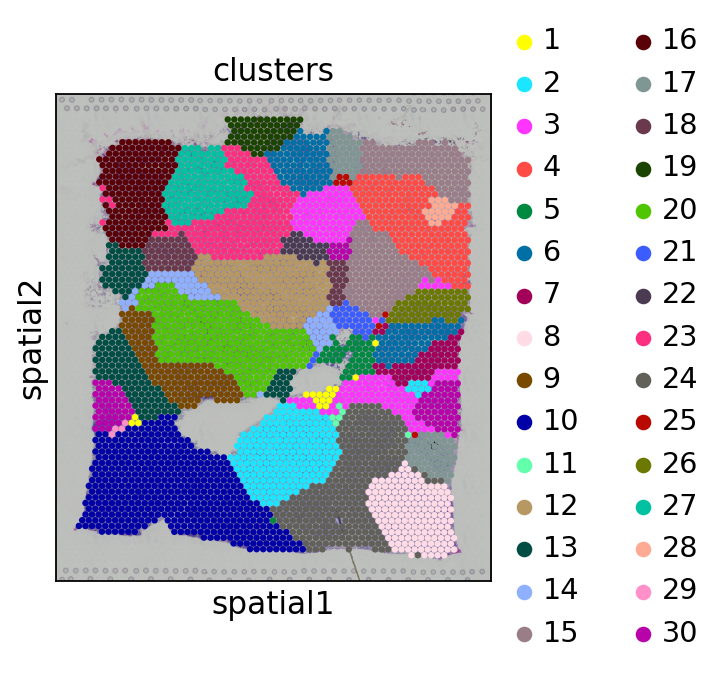

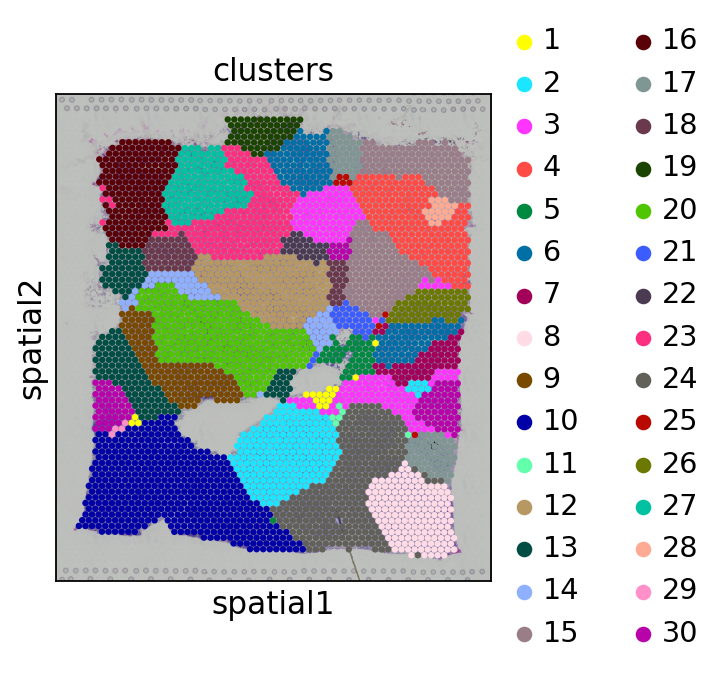

In [9]:
import matplotlib as mpl
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import visual
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
warnings.filterwarnings('ignore')
file_fold = '/home/cuiyaxuan/spatialLIBD/3.Human_Breast_Cancer' #### to your path
adata = sc.read_visium(file_fold, count_file='filtered_feature_bc_matrix.h5', load_images=True) #### project name
df_label=pd.read_csv('./label.csv', index_col=0) 
visual.visual(adata,df_label)
